# Graphs depicting the blacklisting frequency of multiple liars infiltrating multiple clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#configs
distance = 100000
nbClusters = 2
nbLiars = 4
nbNodesRange = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
withSuspects = True


filename = "cluster_infiltration_N_" + str(nbNodesRange[0]) + "_to_" + \
    str(nbNodesRange[len(nbNodesRange)-1]) + "_with_" + str(nbClusters) +\
    "_clusters_" + str(nbLiars) + "_liars"

if withSuspects:
    filename += "_with_suspects"


In [3]:
data= pd.read_csv("data/" + filename + ".csv").drop_duplicates()

In [4]:
data[data["liar_caught"] == False][data["N"] == 12]

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N,c1,c2,liar_caught


In [5]:
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()

liar_caught,N,False,True
0,13,6,6
1,14,8,5
2,15,6,8
3,16,8,7
4,17,10,6
5,18,8,9
6,19,10,8
7,20,12,7
8,21,10,10
9,22,12,9


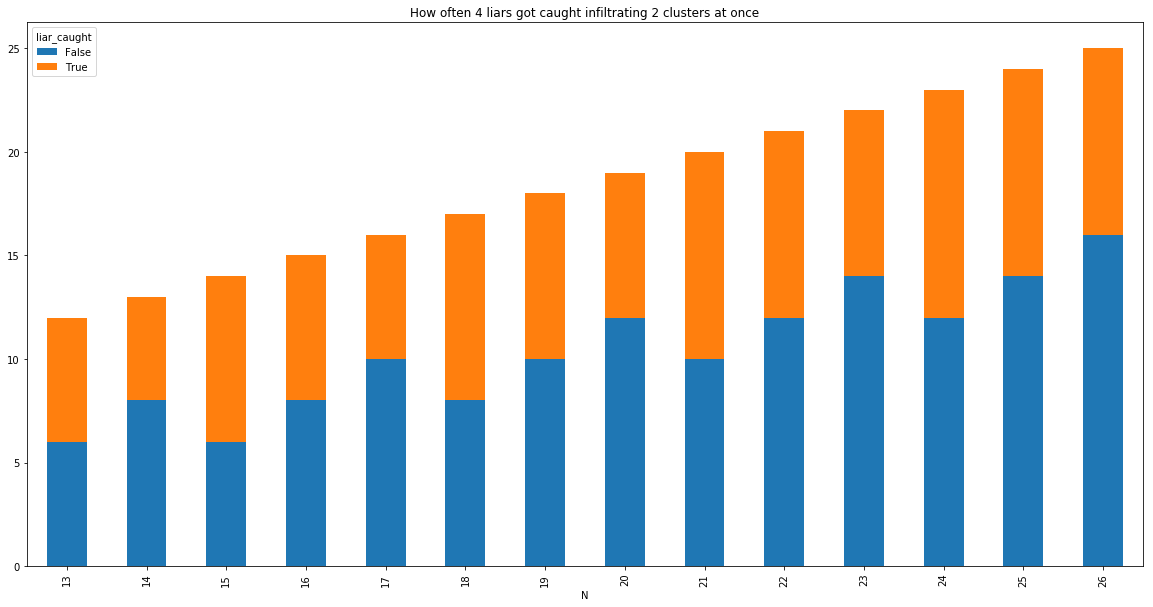

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
data[["N", "liar_caught"]].groupby(["N", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
    .plot.bar(stacked=True, ax=ax, x="N", 
              title="How often "+str(nbLiars)+" liars got caught infiltrating "+str(nbClusters)+" clusters at once")

In [7]:
fig.savefig('graphs/blacklisting_percentages/'+filename+'.png')

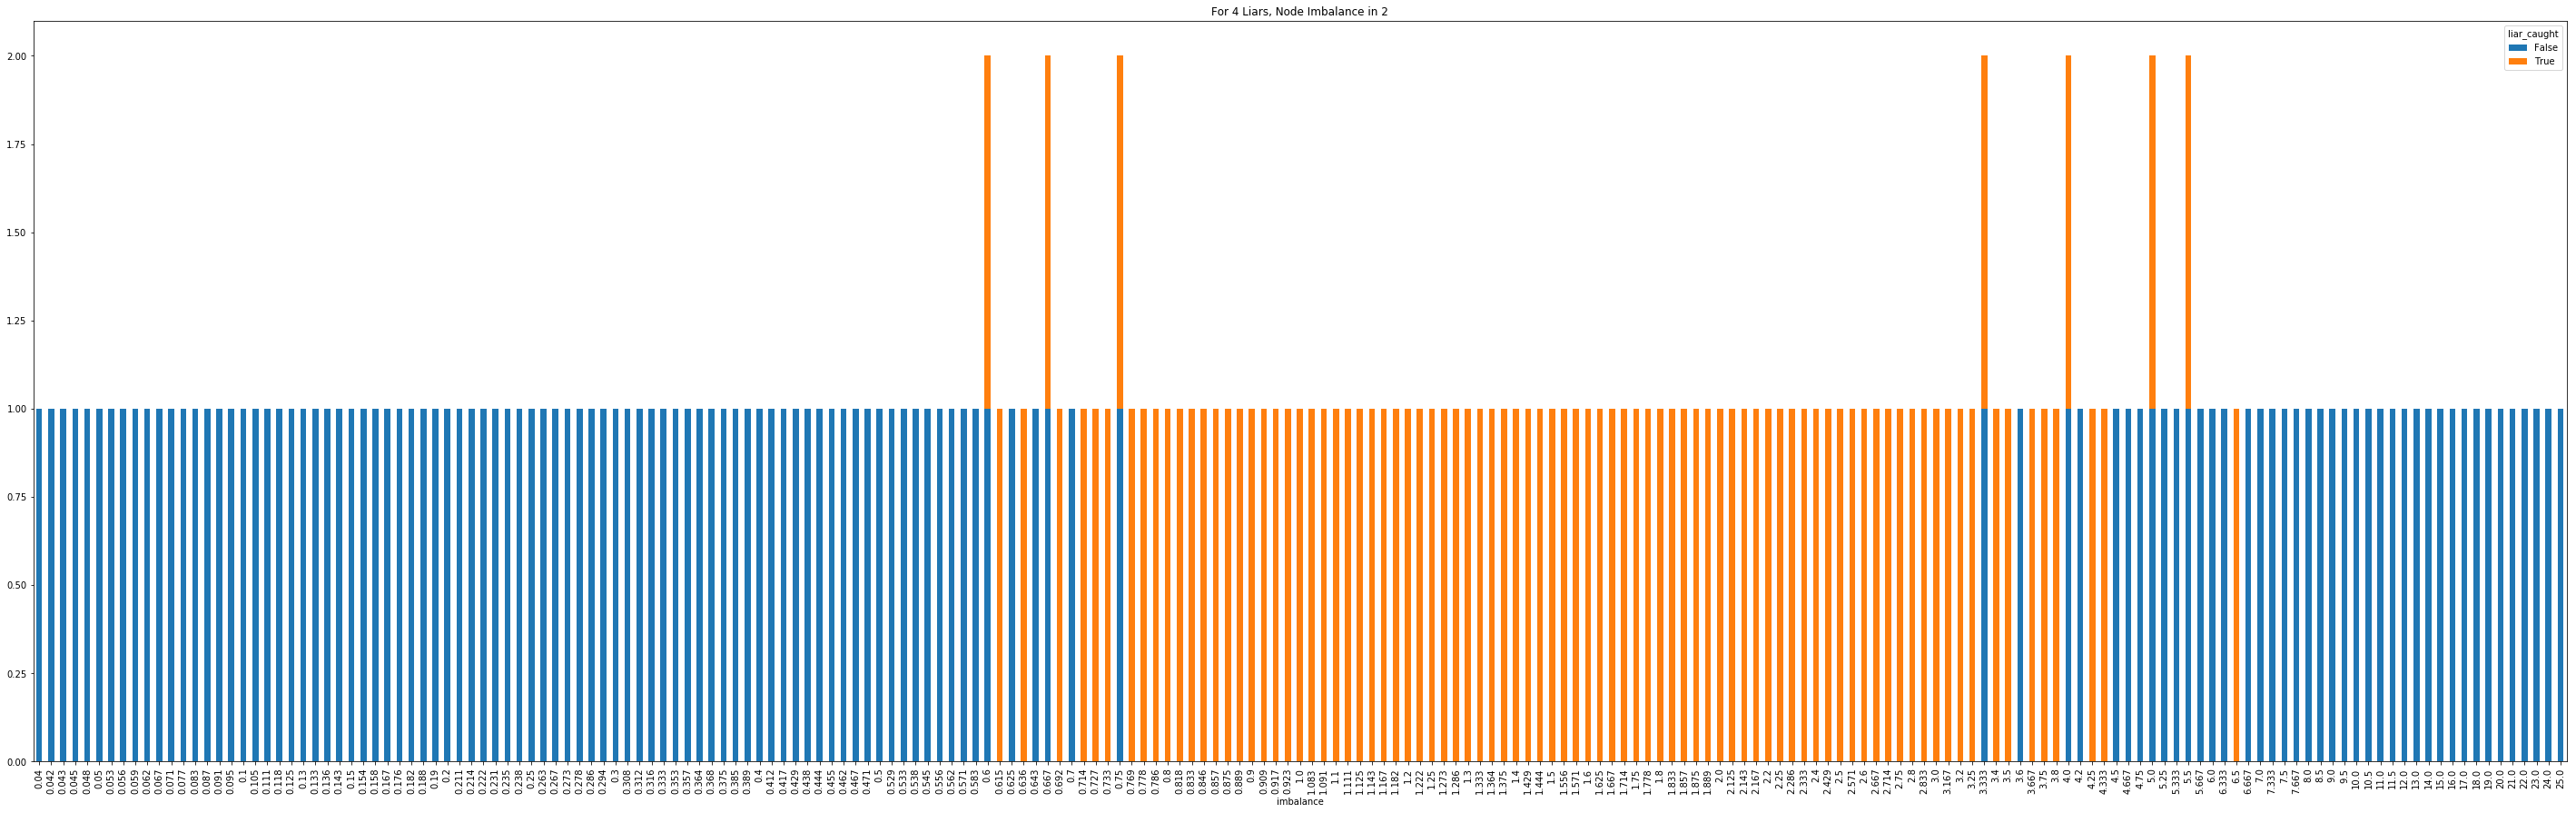

In [8]:
if nbClusters == 2:
    data["imbalance"] = (data["c1"]/data["c2"]).round(3)
    fig1, ax1 = plt.subplots(figsize=(50, 15))
    data[["imbalance", "liar_caught"]].drop_duplicates()\
        .groupby(["imbalance", "liar_caught"]).size().unstack(fill_value=0).reset_index()\
        .plot.bar(stacked=True, ax=ax1, x="imbalance",  
                  title="For "+str(nbLiars)+" Liars, Node Imbalance in "+str(nbClusters))
    fig1.savefig('graphs/cluster_ratios/'+filename+'_cluster_ratio.png')